# Evaluating Adversarial Attack of AI Models for Titanic Survival Prediction
Team Members:
1. – Youssef Wael Farouk Elfeshawy 2206188 - (Cybersecurity)
2. – Mustafa Othman 2206191 - (Cybersecurity)
3. – Wagd Hossam 2206189 - (Cybersecurity)
4. – Habiba Mohamed 2206179 - (Cybersecurity)
5. – Filopatire Awedallah Antanious 2206202 - (Cybersecurity)
6. – Peter Hani Fekri 2306135 - (Cybersecurity)
7. – Hassan Waleed Hassan 22010466 - (Intelligent Systems)

Running the code in a conda environment:

- conda create --name myenv python=3.8
- conda activate myenv
- conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
- python -m pip install "tensorflow<2.11"
- pip install ipykernel
- conda install numpy
- conda install pandas
- conda install matplotlib
- conda install seaborn
- conda install scikit-learn

In [1]:
# begin with the librarys needed:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# check gpu usage: 

gpus = tf.config.list_physical_devices('GPU')   # List all physical devices
if gpus:
    print(f"GPUs Available: {gpus}")
else:
    print("No GPU found, running on CPU.")


GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Trained Dataset

Titanic Dataset: A publicly available dataset (e.g., via Kaggle) with 1309 passenger
records, including features (pclass, sex, age, sibsp, parch, embarked) and the target
(survived)

Dataset Link: https://www.kaggle.com/competitions/titanic/data

## Reading

In [4]:
df = pd.read_csv("https://raw.github.com/youssifelfeshawy/Ai-Security/main/titanic.csv")
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [5]:
df.shape

(1309, 11)

In [6]:
df.head(20)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,1
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,1
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,0


In [7]:
# Shows the data type for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Cleaning

In [8]:
# These columns are dropped as they dont provide any value to the training
columns_to_drop = ['name', 'cabin','ticket','fare']
df.drop(columns=columns_to_drop, inplace=True)
df

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,female,29.0000,0,0,S,1
1,1,male,0.9167,1,2,S,1
2,1,female,2.0000,1,2,S,0
3,1,male,30.0000,1,2,S,0
4,1,female,25.0000,1,2,S,0
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,C,0
1305,3,female,NaN,1,0,C,0
1306,3,male,26.5000,0,0,C,0
1307,3,male,27.0000,0,0,C,0


In [9]:
# map string to intger
df['sex'] = df['sex'].replace({'female':1, 'male':0})
df['embarked'] = df['embarked'].replace({'S':0, 'C':1,'Q':2})  # remove
df

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,1,29.0000,0,0,0.0,1
1,1,0,0.9167,1,2,0.0,1
2,1,1,2.0000,1,2,0.0,0
3,1,0,30.0000,1,2,0.0,0
4,1,1,25.0000,1,2,0.0,0
...,...,...,...,...,...,...,...
1304,3,1,14.5000,1,0,1.0,0
1305,3,1,NaN,1,0,1.0,0
1306,3,0,26.5000,0,0,1.0,0
1307,3,0,27.0000,0,0,1.0,0


In [10]:
# Shows the total null values in each column so we can handle them accordingly
df.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
embarked      2
survived      0
dtype: int64

In [11]:
# fill missing values with the value from the previous row , since they are only 2 values, this wont affect the training accuracy much
df["embarked"].fillna(method="ffill", inplace=True)

df.isnull().sum()


pclass        0
sex           0
age         263
sibsp         0
parch         0
embarked      0
survived      0
dtype: int64

## Visualization

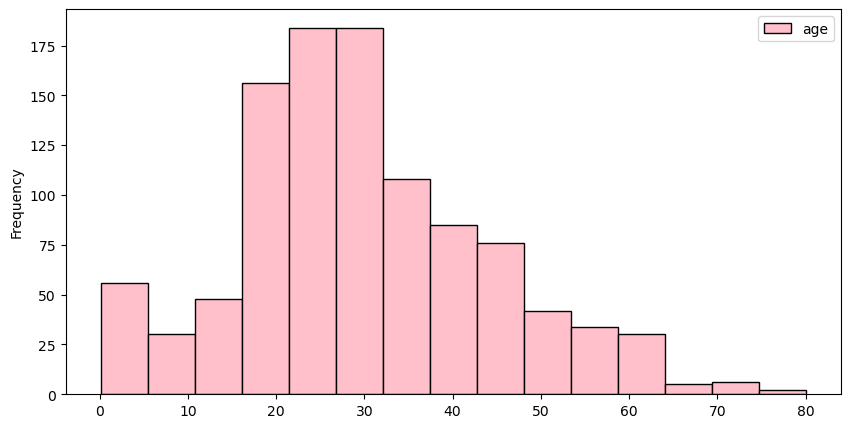

In [12]:
plt.rcParams['figure.figsize']=(10,5)

selected_columns = ['age']  
df[selected_columns].plot(kind='hist', bins=15, layout=(len(selected_columns)),  color='pink', edgecolor= 'black')

plt.show()

The graph shows the age distribution of Titanic passengers. It reveals that most passengers were between 20-30 years old, with fewer passengers in older age groups. This insight can be used to analyze how age influences survival rates.

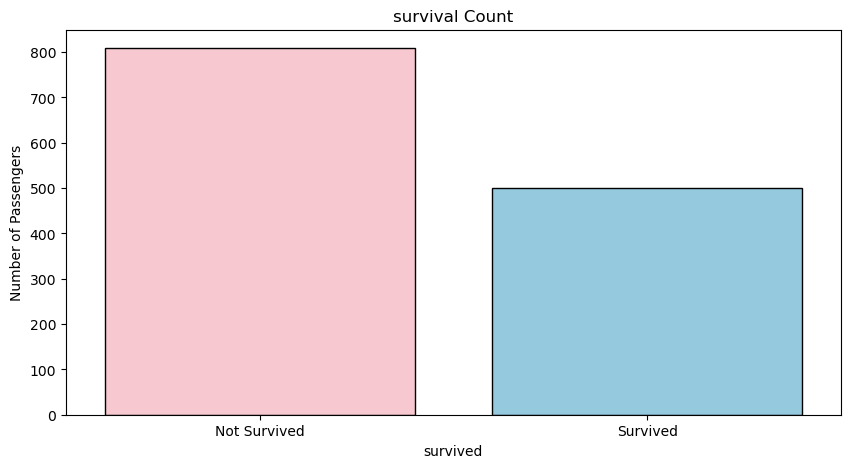

<Figure size 1000x500 with 0 Axes>

In [13]:
sns.countplot(data=df, x="survived", palette=["pink", "skyblue"], edgecolor='black')

plt.xlabel("survived")
plt.ylabel("Number of Passengers")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.title("survival Count")
plt.figure(figsize=(10, 5))
plt.show()

The graph presents the survival count of passengers. It clearly shows that a larger number of passengers did not survive, with about 800 passengers not surviving compared to 500 who survived.

In [14]:
# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column with the binned ages
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df.head())

   pclass  sex      age  sibsp  parch  embarked  survived age_group
0       1    1  29.0000      0      0       0.0         1     20-30
1       1    0   0.9167      1      2       0.0         1      0-10
2       1    1   2.0000      1      2       0.0         0      0-10
3       1    0  30.0000      1      2       0.0         0     30-40
4       1    1  25.0000      1      2       0.0         0     20-30


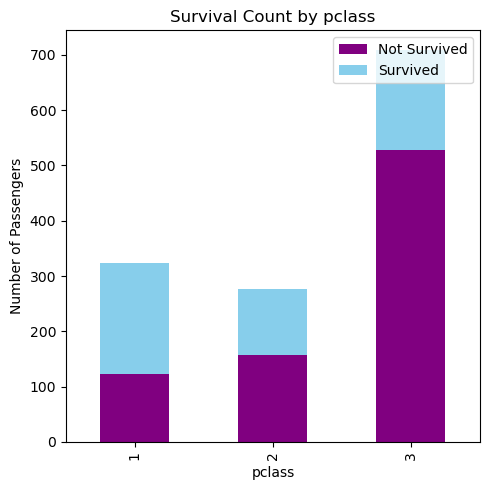

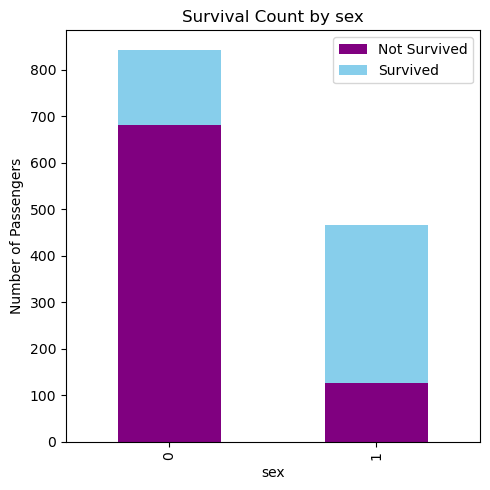

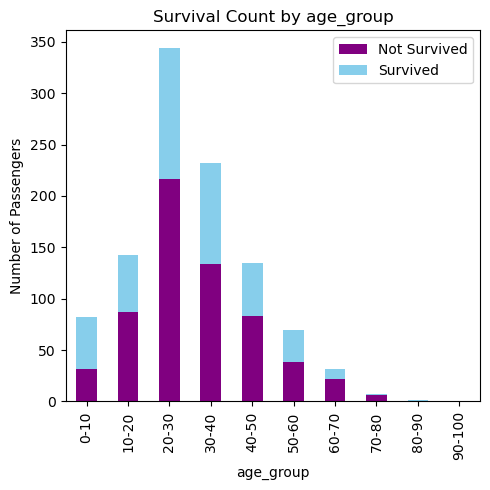

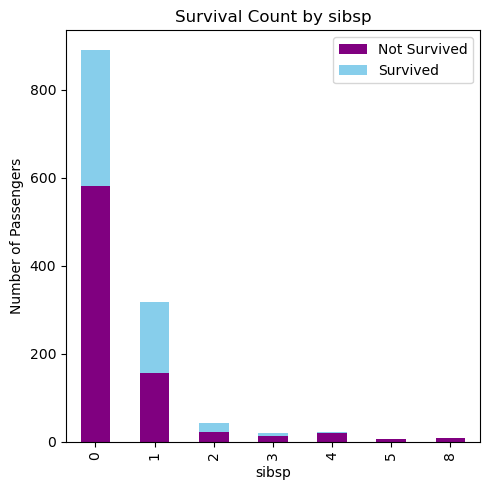

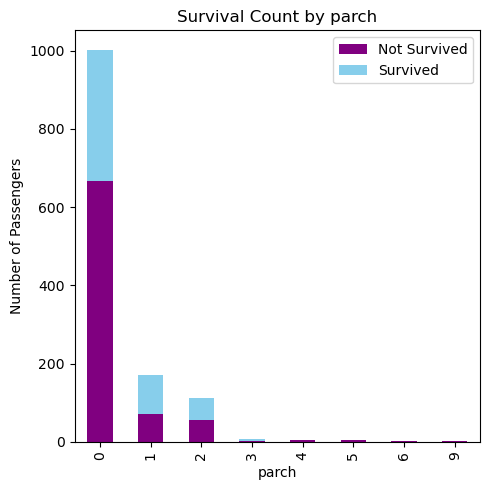

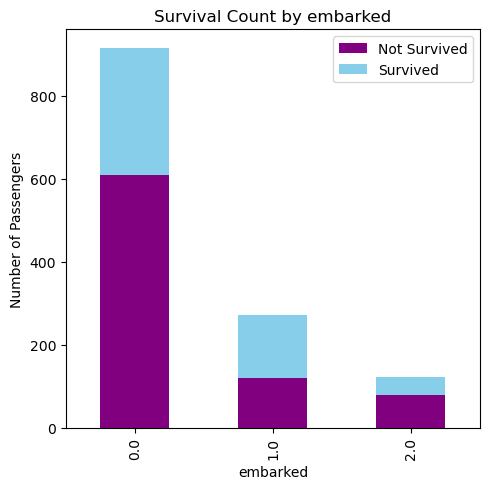

In [15]:
columns_to_plot = ["pclass", "sex", "age_group", "sibsp", "parch", "embarked"]

# Plotting for each column
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(5, 5))
    survival_counts = df.groupby(column)["survived"].value_counts().unstack()
    survival_counts.plot(
        kind="bar", stacked=True, color=["purple", "skyblue"], ax=ax
    )
    ax.set_xlabel(column)
    ax.set_ylabel("Number of Passengers")
    ax.set_title(f"Survival Count by {column}")
    ax.legend(["Not Survived", "Survived"], loc="upper right")
    plt.tight_layout()
    plt.show()

The graphs above will compare passengers that survived and didn't survive to other columns in the list variable 'columns_to_plot'. This will show us how much each column is related to a passenger's survival rate.

## Splitting

Splitting the data into x and y variables, the y variable being what we want to predict given x.

In [16]:
X = df[["pclass", "sex", "age", "sibsp", "parch","embarked"]]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1047, 6), y_train shape: (1047,)
X_test shape: (262, 6), y_test shape: (262,)


Checking how many nulls are in the training data.

In [17]:
X_train.isnull().sum()


pclass        0
sex           0
age         211
sibsp         0
parch         0
embarked      0
dtype: int64

We can combat this issue by replacing the null with the mean age of the X-train. This has the least affect on the data as it made in a smaller scale than the whole dataset.

In [18]:
# Fill null values with the mean
X_train_mean_value = X_train['age'].mean()
X_train['age'].fillna(X_train_mean_value, inplace=True)


X_test_mean_value = X_test["age"].mean()
X_test['age'].fillna(X_test_mean_value, inplace=True)

In [19]:
X_train.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

In [20]:
X_test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

# Test Dataset

## Reading

In [21]:
tdf = pd.read_csv("https://raw.github.com/youssifelfeshawy/Ai-Security/main/test.csv")
tdf

,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Preprocessing

In [22]:
# Dropping columns 'name', 'cabin', 'ticket', and 'fare' as they dont provide value to our testing.
columns_to_drop = [
    "name",
    "cabin",
    "ticket",
    "fare"
]
tdf.drop(columns=columns_to_drop, inplace=True)
tdf

,pclass,sex,age,sibSp,parch,embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
5,3,male,14.0,0,0,S
6,3,female,30.0,0,0,Q
7,2,male,26.0,1,1,S
8,3,female,18.0,0,0,C
9,3,male,21.0,2,0,S


In [23]:
# Replacing male and female with numerical values so they can be used in algorithms
tdf["sex"] = tdf["sex"].replace({"female": 1, "male": 0})
tdf["embarked"] = tdf["embarked"].replace({"S": 0, "C": 1, "Q": 2})
tdf

,pclass,sex,age,sibSp,parch,embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0
5,3,0,14.0,0,0,0
6,3,1,30.0,0,0,2
7,2,0,26.0,1,1,0
8,3,1,18.0,0,0,1
9,3,0,21.0,2,0,0


In [24]:
# Checking for null values and dealing with them accordingly
tdf.isnull().sum()

pclass      0
sex         0
age         1
sibSp       0
parch       0
embarked    0
dtype: int64

In [25]:
# Replace the age null value with the mean of the test data
mean_value = tdf["age"].mean()
tdf["age"].fillna(mean_value, inplace=True)
tdf.isnull().sum()

pclass      0
sex         0
age         0
sibSp       0
parch       0
embarked    0
dtype: int64

In [26]:
# Change the name of the column to be the same as the training dataset
tdf = tdf.rename(columns={"sibSp": "sibsp"})
tdf

,pclass,sex,age,sibsp,parch,embarked
0,3,0,34.500000,0,0,2
1,3,1,47.000000,1,0,0
2,2,0,62.000000,0,0,2
3,3,0,27.000000,0,0,0
4,3,1,22.000000,1,1,0
5,3,0,14.000000,0,0,0
6,3,1,30.000000,0,0,2
7,2,0,26.000000,1,1,0
8,3,1,18.000000,0,0,1
9,3,0,21.000000,2,0,0


In [27]:
print(y_train)

1024    0
467     1
1022    0
996     0
1299    0
       ..
1242    0
924     0
1247    1
271     1
474     0
Name: survived, Length: 1047, dtype: int64


# Data Poisoning

In [28]:
# Function to perform data poisoning (label flipping)
def poison_data(y_train, poison_ratio, seed):
    y_poisoned = y_train.copy()
    np.random.seed(seed)  # Set the random seed for reproducibility
    num_samples = len(y_train)
    num_poison = int(poison_ratio * num_samples)
    poison_indices = np.random.choice(num_samples, size=num_poison, replace=False)
    y_poisoned.iloc[poison_indices] = 1 - y_poisoned.iloc[poison_indices]  # Flip labels (0 to 1, 1 to 0)

    return y_poisoned


# Poison the training labels
y_train_poisoned = poison_data(y_train, poison_ratio=0.7, seed=42)

# Evalutaion Model Function

In [29]:
# Function to evaluate model and return metrics with two decimal places
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': f"{accuracy_score(y_test, y_pred):.2f}",
        'Precision': f"{precision_score(y_test, y_pred):.2f}",
        'Recall': f"{recall_score(y_test, y_pred):.2f}",
        'F1-score': f"{f1_score(y_test, y_pred):.2f}",
    }
    
    # Print each metric on a new line
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    
    return model

# KNN

KNN (K-Nearest Neighbors) is a simple, instance-based machine learning algorithm that classifies data points based on the majority class of their nearest neighbors. The number of neighbors, 𝑘, is a user-defined parameter.

In [30]:
knn = KNeighborsClassifier(n_neighbors=3) # instantiate the model

print("Calculate evaluation metrics with default parameters using cleaned data:")
knn_cleaned = evaluate_model(knn, X_train, y_train, X_test, y_test)

print("\nCalculate evaluation metrics with default parameters using poisoned data:")
knn_poisoned = evaluate_model(knn, X_train, y_train_poisoned, X_test, y_test)

Calculate evaluation metrics with default parameters using cleaned data:
Accuracy: 0.73
Precision: 0.73
Recall: 0.56
F1-score: 0.64

Calculate evaluation metrics with default parameters using poisoned data:
Accuracy: 0.40
Precision: 0.34
Recall: 0.46
F1-score: 0.39


#### Tuning KNN to check which parameters have the best accuracy:

In [31]:
def tune_knn_model(X_train, y_train, X_test, y_test):
    # Define different distance metrics and k values to experiment with
    distance_metrics = ["euclidean", "manhattan", "chebyshev"]
    k_values = [3, 5, 7, 9, 11]
    
    best_accuracy = 0
    best_distance = None
    best_k = None

    # Perform grid search over distance metrics and k values
    for metric in distance_metrics:
        for k in k_values:
            # Instantiate the KNN classifier with the current distance metric and k value
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

            # Train the model on the training data
            knn.fit(X_train, y_train)

            # Make predictions on the validation set
            y_valid_pred = knn.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_valid_pred)

            # Print the accuracy for the current combination of parameters
            print(f"Validation Accuracy with {metric} distance metric and k={k}: {accuracy:.4f}")

            # Update the best parameters if the current combination yields better performance
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_distance = metric
                best_k = k

    print(f"\nBest parameters - Distance Metric: {best_distance}, k: {best_k}")
    return best_distance, best_k

In [32]:
# Tune the model using the cleaned data
best_distance, best_k = tune_knn_model(X_train, y_train, X_test, y_test)

# Train the model with the best parameters using the cleaned data
print("\nTraining the KNN Model with best parameters using the cleaned data:")
best_knn_cleaned = KNeighborsClassifier(n_neighbors=best_k, metric=best_distance)
best_knn_cleaned = evaluate_model(best_knn_cleaned, X_train, y_train, X_test, y_test)

Validation Accuracy with euclidean distance metric and k=3: 0.7328
Validation Accuracy with euclidean distance metric and k=5: 0.7519
Validation Accuracy with euclidean distance metric and k=7: 0.7481
Validation Accuracy with euclidean distance metric and k=9: 0.7519
Validation Accuracy with euclidean distance metric and k=11: 0.7519
Validation Accuracy with manhattan distance metric and k=3: 0.7443
Validation Accuracy with manhattan distance metric and k=5: 0.7595
Validation Accuracy with manhattan distance metric and k=7: 0.7863
Validation Accuracy with manhattan distance metric and k=9: 0.7557
Validation Accuracy with manhattan distance metric and k=11: 0.7634
Validation Accuracy with chebyshev distance metric and k=3: 0.6641
Validation Accuracy with chebyshev distance metric and k=5: 0.6641
Validation Accuracy with chebyshev distance metric and k=7: 0.6679
Validation Accuracy with chebyshev distance metric and k=9: 0.6412
Validation Accuracy with chebyshev distance metric and k=11:

In [33]:
# Tune the model using the poisoned data
best_distance, best_k = tune_knn_model(X_train, y_train_poisoned, X_test, y_test)

# Train the model with the best parameters using the poisoned data
print("\nTraining the KNN Model with best parameters using the poisoned data:")
best_knn_poisoned = KNeighborsClassifier(n_neighbors=best_k, metric=best_distance)
best_knn_poisoned = evaluate_model(best_knn_poisoned, X_train, y_train_poisoned, X_test, y_test)


Validation Accuracy with euclidean distance metric and k=3: 0.4008
Validation Accuracy with euclidean distance metric and k=5: 0.4160
Validation Accuracy with euclidean distance metric and k=7: 0.3969
Validation Accuracy with euclidean distance metric and k=9: 0.4160
Validation Accuracy with euclidean distance metric and k=11: 0.4046
Validation Accuracy with manhattan distance metric and k=3: 0.4122
Validation Accuracy with manhattan distance metric and k=5: 0.4237
Validation Accuracy with manhattan distance metric and k=7: 0.3855
Validation Accuracy with manhattan distance metric and k=9: 0.4008
Validation Accuracy with manhattan distance metric and k=11: 0.3931
Validation Accuracy with chebyshev distance metric and k=3: 0.4351
Validation Accuracy with chebyshev distance metric and k=5: 0.4580
Validation Accuracy with chebyshev distance metric and k=7: 0.4656
Validation Accuracy with chebyshev distance metric and k=9: 0.4542
Validation Accuracy with chebyshev distance metric and k=11:

#### Prediction for the test dataset, 0 is 'Not Survived' and 1 is 'Survived':

In [34]:
KNN_predictions_cleaned = best_knn_cleaned.predict(tdf)
KNN_predictions_poisoned = best_knn_poisoned.predict(tdf)
print(KNN_predictions_cleaned)
print(KNN_predictions_poisoned)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
[1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0]


# Naive Bayes

Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem, assuming that the features are independent. It calculates the probability of each class given the input features and assigns the class with the highest probability.

In [35]:
gnb_cleaned = GaussianNB() # instantiate the model
print("Calculate evaluation metrics using cleaned data:")
gnb_cleaned = evaluate_model(gnb_cleaned, X_train, y_train, X_test, y_test)

gnb_poisoned = GaussianNB() # instantiate the model
print("\nCalculate evaluation metrics using poisoned data:")
gnb_poisoned = evaluate_model(gnb_poisoned, X_train, y_train_poisoned, X_test, y_test)

Calculate evaluation metrics using cleaned data:
Accuracy: 0.75
Precision: 0.70
Recall: 0.69
F1-score: 0.69

Calculate evaluation metrics using poisoned data:
Accuracy: 0.39
Precision: 0.26
Recall: 0.27
F1-score: 0.26


#### Prediction for the test dataset, 0 is 'Not Survived' and 1 is 'Survived':

In [36]:
NB_predictions_cleaned = gnb_cleaned.predict(tdf)
NB_predictions_poisoned = gnb_poisoned.predict(tdf)

print(NB_predictions_cleaned)
print(NB_predictions_poisoned)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1]
[1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0]


# Support Vector Machine (SVM)


Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates data points of different classes with the maximum margin.

In [37]:
svm_cleaned = SVC() # instantiate the model
print("Calculate evaluation metrics using cleaned data:")
svm_cleaned = evaluate_model(svm_cleaned, X_train, y_train, X_test, y_test)

svm_poisoned = SVC() # instantiate the model
print("\nCalculate evaluation metrics using poisoned data:")
svm_poisoned = evaluate_model(svm_poisoned, X_train, y_train_poisoned, X_test, y_test)

Calculate evaluation metrics using cleaned data:
Accuracy: 0.63
Precision: 0.81
Recall: 0.12
F1-score: 0.21

Calculate evaluation metrics using poisoned data:
Accuracy: 0.39
Precision: 0.38
Recall: 0.71
F1-score: 0.49


##### Hyperparameter tuning for SVM to achieve best parameters:

In [38]:
# Function to perform automated grid search for SVM and evaluate the best model
def tune_svm_model(X_train, y_train, X_test, y_test):
    # Define the parameter grid for all kernels, C, and gamma values
    param_grid = [
        {
            'kernel': ['linear'],
            'C': [0.1, 1, 10]
        },
        {
            'kernel': ['poly'],
            'C': [0.1, 1, 10],
            'degree': [2, 3],
            'gamma': ['scale', 'auto', 0.01, 0.1]
        },
        {
            'kernel': ['rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto', 0.01, 0.1]
        }
    ]

    # Create the GridSearchCV object
    grid_search = GridSearchCV(
        SVC(random_state=20),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Perform grid search on the training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best cross-validation accuracy
    best_params = grid_search.best_params_
    best_cv_accuracy = grid_search.best_score_

    # Extract individual parameters
    best_kernel = best_params['kernel']
    best_C = best_params['C']
    best_gamma = best_params.get('gamma', None)  # None for linear kernel
    best_degree = best_params.get('degree', None)  # None for non-poly kernels

    print(f"\nBest Parameters from Grid Search:")
    print(f"Kernel: {best_kernel}, C: {best_C}, Gamma: {best_gamma}, Degree: {best_degree}")
    print(f"Best Cross-Validation Accuracy: {best_cv_accuracy:.4f}")


    return best_kernel, best_C, best_gamma

In [39]:
# Tune the model using the cleaned data
best_kernel, best_C, best_gamma = tune_svm_model(X_train, y_train, X_test, y_test)

# Train the model with the best parameters using the cleaned data
print("\nTraining the SVM Model with best parameters using the cleaned data:")
best_svm_cleaned = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C) # instantiate the model
best_svm_cleaned = evaluate_model(best_svm_cleaned, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 39 candidates, totalling 195 fits

Best Parameters from Grid Search:
Kernel: rbf, C: 10, Gamma: 0.01, Degree: None
Best Cross-Validation Accuracy: 0.8090

Training the SVM Model with best parameters using the cleaned data:
Accuracy: 0.79
Precision: 0.76
Recall: 0.72
F1-score: 0.74


In [40]:
# Tune the model using the cleaned data
best_kernel, best_C, best_gamma = tune_svm_model(X_train, y_train_poisoned, X_test, y_test)

# Train the model with the best parameters using the cleaned data
print("\nTraining the SVM Model with best parameters using the poisoned data:")
best_svm_poisoned = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C) # instantiate the model
best_svm_poisoned = evaluate_model(best_svm_poisoned, X_train, y_train_poisoned, X_test, y_test)

Fitting 5 folds for each of 39 candidates, totalling 195 fits

Best Parameters from Grid Search:
Kernel: poly, C: 10, Gamma: 0.1, Degree: 2
Best Cross-Validation Accuracy: 0.5960

Training the SVM Model with best parameters using the poisoned data:
Accuracy: 0.26
Precision: 0.25
Recall: 0.41
F1-score: 0.31


##### Prediction for the test dataset, 0 is 'Not Survived' and 1 is 'Survived':

In [41]:
SVM_predictions_cleaned = best_svm_cleaned.predict(tdf)
SVM_predictions_poisoned = best_svm_poisoned.predict(tdf)
print(SVM_predictions_cleaned)
print(SVM_predictions_poisoned)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1]
[1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1]


# Artificial Neural Networks (ANN)

An Artificial Neural Network (ANN) is a machine learning model inspired by the human brain, consisting of layers of interconnected nodes (neurons). It learns patterns in data through training by adjusting weights to minimize errors.

In [42]:
# Create and train the ANN model
ann_cleaned = MLPClassifier(
    hidden_layer_sizes=(100,), activation="relu", random_state=20
)
print("Calculate evaluation metrics using cleaned data:")
ann_cleaned = evaluate_model(ann_cleaned, X_train, y_train, X_test, y_test)


ann_poisoned = MLPClassifier(
    hidden_layer_sizes=(100,), activation="relu", random_state=20
)
print("\nCalculate evaluation metrics using poisoned data:")
ann_poisoned = evaluate_model(ann_poisoned, X_train, y_train_poisoned, X_test, y_test)

Calculate evaluation metrics using cleaned data:
Accuracy: 0.80
Precision: 0.79
Recall: 0.71
F1-score: 0.75

Calculate evaluation metrics using poisoned data:
Accuracy: 0.23
Precision: 0.22
Recall: 0.35
F1-score: 0.27


##### Prediction for the test dataset, 0 is 'Not Survived' and 1 is 'Survived':

In [43]:
ANN_predictions_cleaned = ann_cleaned.predict(tdf)
ANN_predictions_poisoned = ann_poisoned.predict(tdf)

print(ANN_predictions_cleaned)
print(ANN_predictions_poisoned)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1]
[1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0]


# Add the predictions to Dataframe

In [44]:
tdf["KNN predictions"] = KNN_predictions_cleaned
tdf["Naive Bayes predictions"] = NB_predictions_cleaned
tdf["Support Vector Machine predictions"] = SVM_predictions_cleaned
tdf["Artificial Neural Networks predictions"] = ANN_predictions_cleaned
tdf["Poisoned KNN predictions"] = KNN_predictions_poisoned
tdf["Poisoned Naive Bayes predictions"] = NB_predictions_poisoned
tdf["Poisoned Support Vector Machine predictions"] = SVM_predictions_poisoned
tdf["Poisoned Artificial Neural Networks predictions"] = ANN_predictions_poisoned
tdf

,pclass,sex,age,sibsp,parch,embarked,KNN predictions,Naive Bayes predictions,Support Vector Machine predictions,Artificial Neural Networks predictions,Poisoned KNN predictions,Poisoned Naive Bayes predictions,Poisoned Support Vector Machine predictions,Poisoned Artificial Neural Networks predictions
0,3,0,34.500000,0,0,2,0,0,0,0,1,1,1,1
1,3,1,47.000000,1,0,0,0,1,1,1,1,0,0,0
2,2,0,62.000000,0,0,2,0,0,0,0,1,1,1,1
3,3,0,27.000000,0,0,0,0,0,0,0,0,1,1,1
4,3,1,22.000000,1,1,0,1,1,1,1,0,0,1,0
5,3,0,14.000000,0,0,0,0,0,0,0,0,1,0,1
6,3,1,30.000000,0,0,2,1,1,1,1,0,0,1,0
7,2,0,26.000000,1,1,0,0,0,0,0,0,1,0,1
8,3,1,18.000000,0,0,1,0,1,1,1,1,0,1,0
9,3,0,21.000000,2,0,0,0,0,0,0,1,1,1,1
